## Personal Loan Campaign

# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

# Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
# Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



### Loading Libraries

In [752]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction

from sklearn.linear_model import LogisticRegression

# To get diferent metric scores

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

# Exploratory Data Analysis on the data

### Load data

In [753]:
loan_df = pd.read_csv("Loan_Modelling.csv")

In [754]:
# copying data to another variable to avoid any changes to original data
data = loan_df.copy()

### View the first and last 5 rows of the dataset.

In [601]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [602]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [603]:
data.shape

(5000, 14)

* The dataset has 5000 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [604]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [605]:
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


In [606]:
data.isnull().sum().sort_values(ascending=False)

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [607]:
# checking for duplicate values in the data
data.duplicated().sum() 


0

### Summary of the dataset.

In [608]:
# let's check the summary of our data
data.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [758]:
category_cols = ['Personal_Loan','Securities_Account','CD_Account','Online','CreditCard','Education']

def category_convert(category_cols):
    for colname in category_cols:
        data[colname] = data[colname].astype('category')
    
category_convert(category_cols)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(7)
memory usage: 342.7 KB


In [750]:
for i in category_cols:
    print("Unique values in", i)
    print(data[i].value_counts())

Unique values in Personal_Loan
0    4468
1     480
Name: Personal_Loan, dtype: int64
Unique values in Securities_Account
0    4432
1     516
Name: Securities_Account, dtype: int64
Unique values in CD_Account
0    4646
1     302
Name: CD_Account, dtype: int64
Unique values in Online
1    2954
0    1994
Name: Online, dtype: int64
Unique values in CreditCard
0    3493
1    1455
Name: CreditCard, dtype: int64
Unique values in Education
1    2080
3    1481
2    1387
Name: Education, dtype: int64


In [610]:
data.Family.unique()

array([4, 3, 1, 2])

In [611]:
data.Education.unique()

[1, 2, 3]
Categories (3, int64): [1, 2, 3]

## Univariate Analysis

In [613]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations 

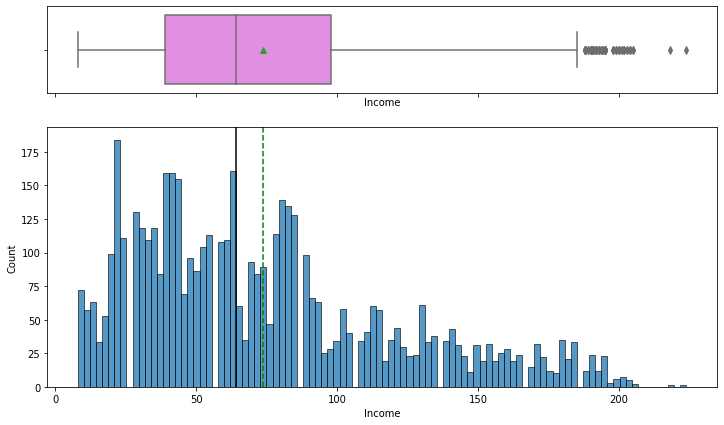

In [755]:
histogram_boxplot(data, "Income", bins=100)

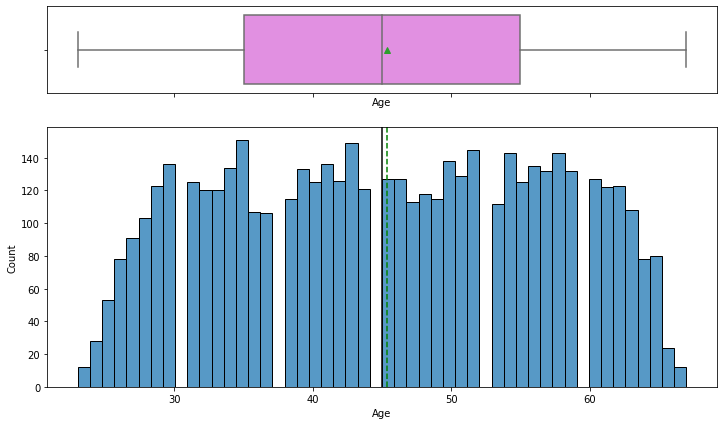

In [756]:
histogram_boxplot(data, "Age", bins=50)

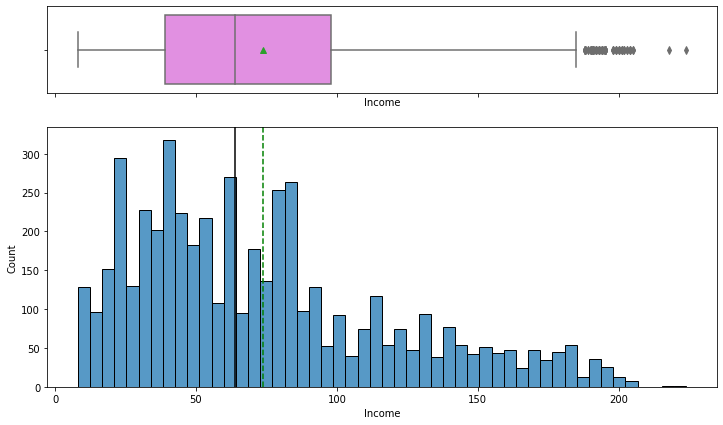

In [617]:
histogram_boxplot(data, "Income", bins=50)

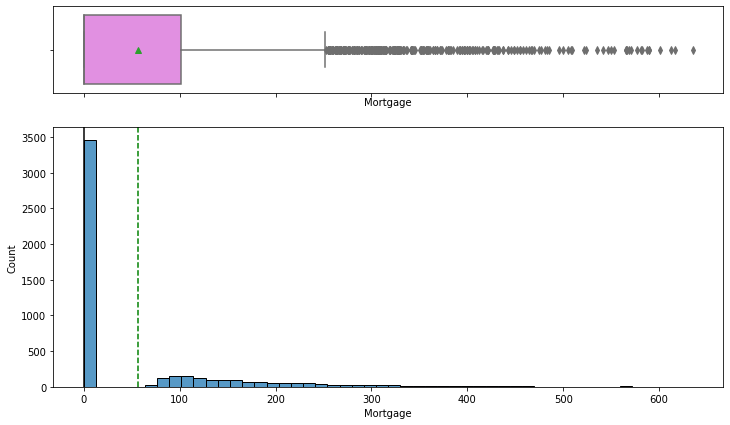

In [618]:
histogram_boxplot(data, "Mortgage", bins=50)

* Mortgage and CCAvg, Income have outliers that might need outlier treatment 


In [621]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations

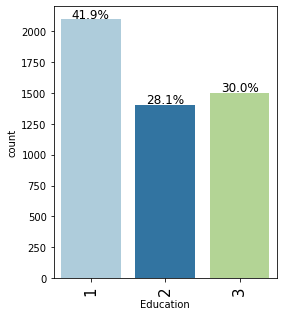

In [622]:
labeled_barplot(data, "Education", perc=True)

* 42% of candidates have Undergrad degree

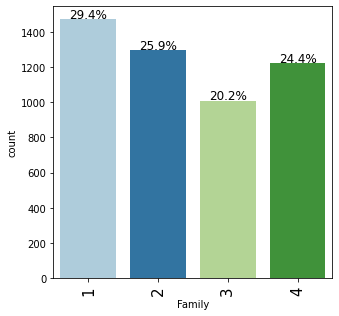

In [763]:
labeled_barplot(data, "Family", perc=True)

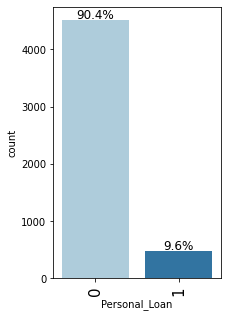

In [762]:
labeled_barplot(data, "Personal_Loan", perc=True)

* Single person is slightly more in the dataset.
* Personal loan was taken in the past by 9% as described in problem statement.


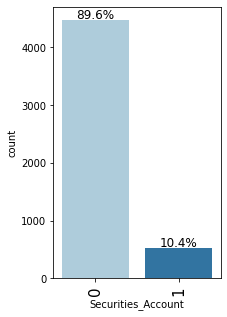

In [765]:

labeled_barplot(data, "Securities_Account", perc=True)


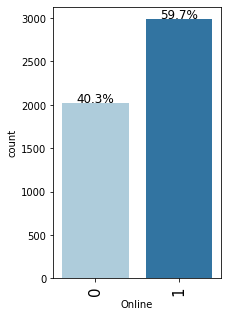

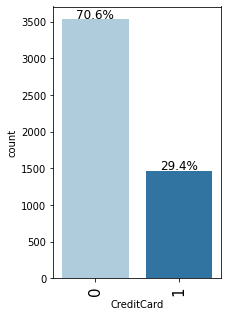

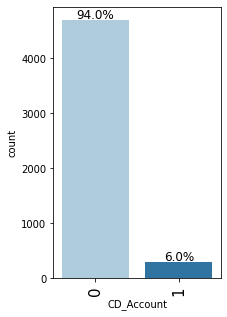

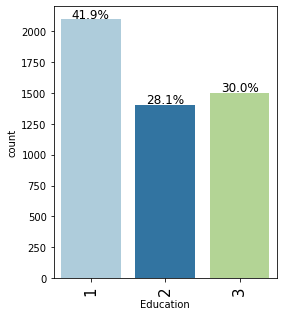

In [767]:
labeled_barplot(data, "Online", perc=True)
labeled_barplot(data, "CreditCard", perc=True)
labeled_barplot(data, "CD_Account", perc=True)
labeled_barplot(data, "Education", perc=True)

## Bivariate analysis

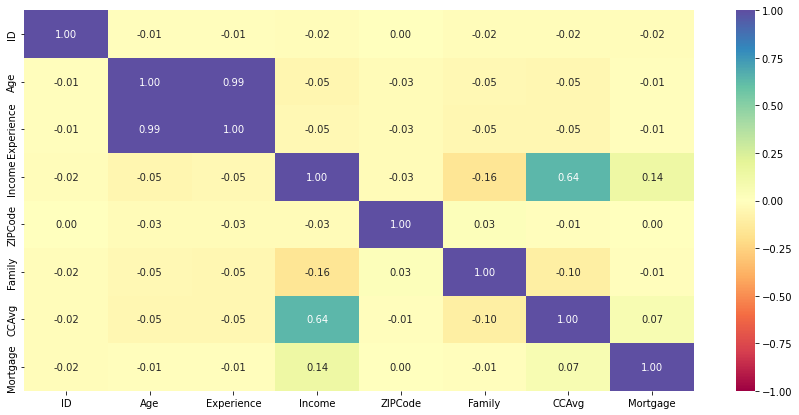

In [625]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns. Income and CCAvg, Mortagage has small positive correlation 

In [626]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


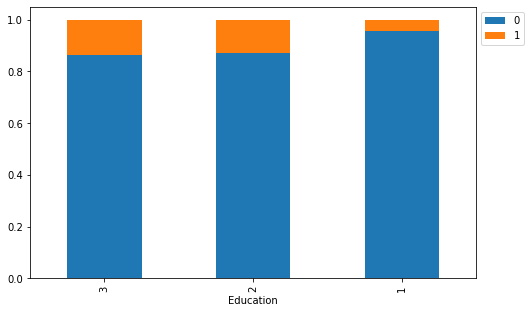

In [768]:
# 'Personal_Loan','Securities_Account','CD_Account','Online','CreditCard','Education'
stacked_barplot(data, "Education", "Personal_Loan")



Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


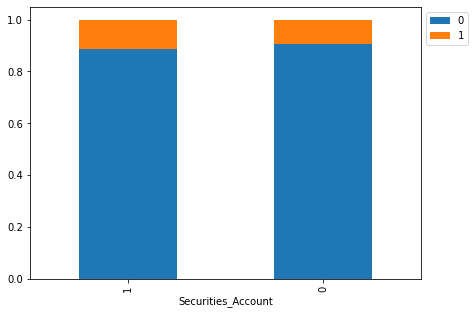

In [769]:

stacked_barplot(data, "Securities_Account", "Personal_Loan")


Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


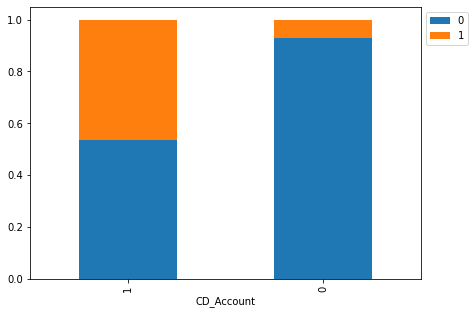

In [770]:
stacked_barplot(data, "CD_Account", "Personal_Loan")


Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


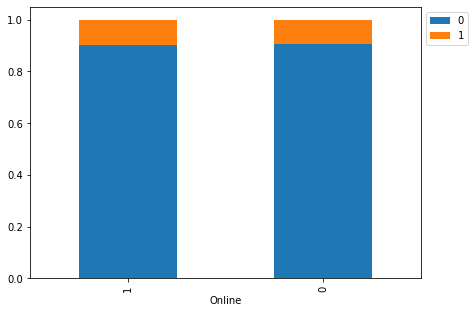

In [771]:
stacked_barplot(data, "Online", "Personal_Loan")

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


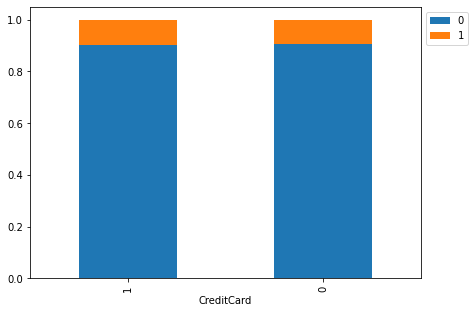

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


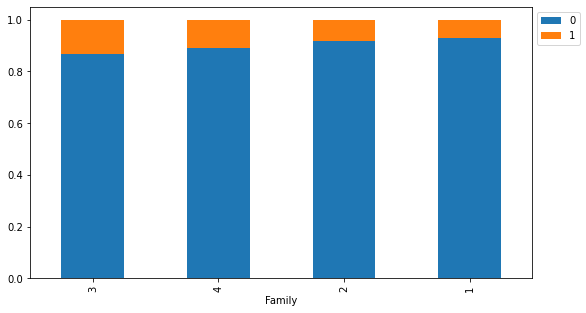

In [773]:

stacked_barplot(data, "CreditCard", "Personal_Loan")
stacked_barplot(data, "Family", "Personal_Loan")

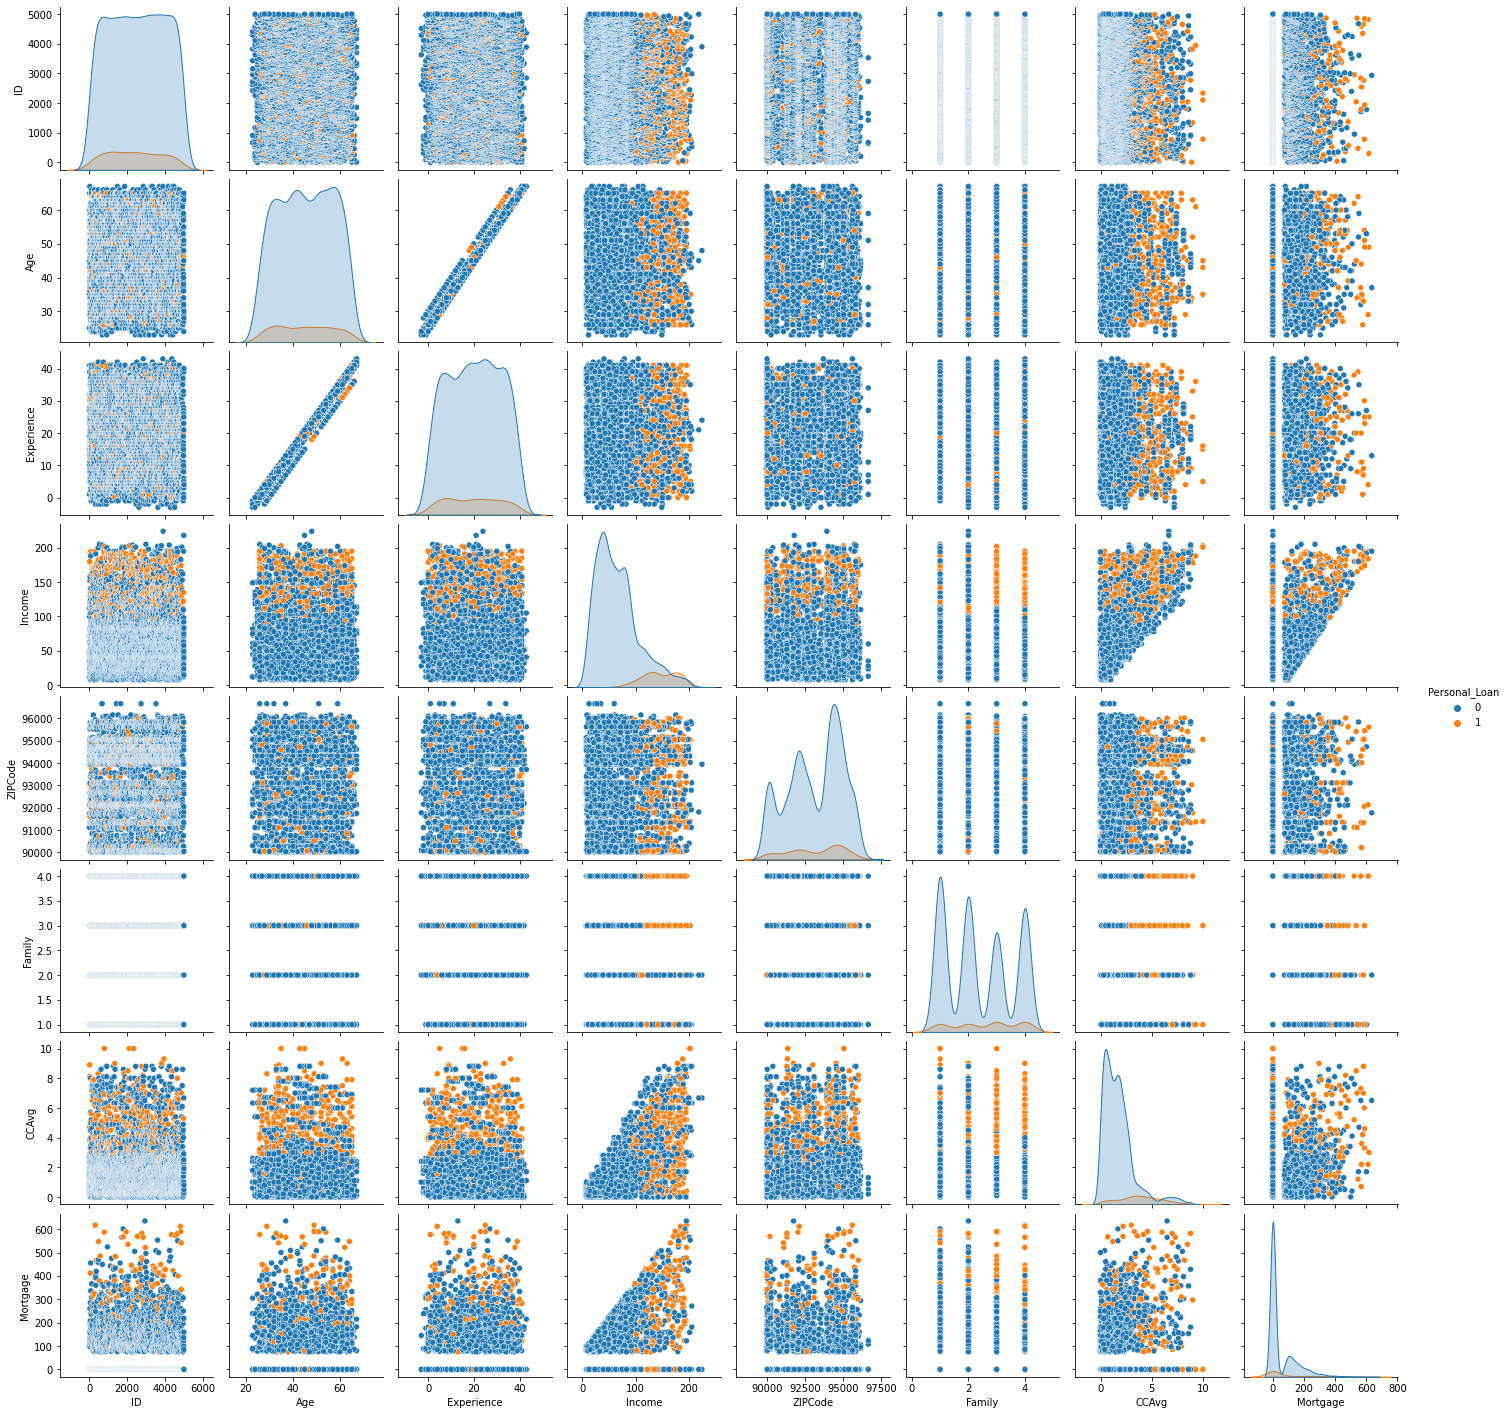

In [774]:
sns.pairplot(data, hue="Personal_Loan")
plt.show()

In [628]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

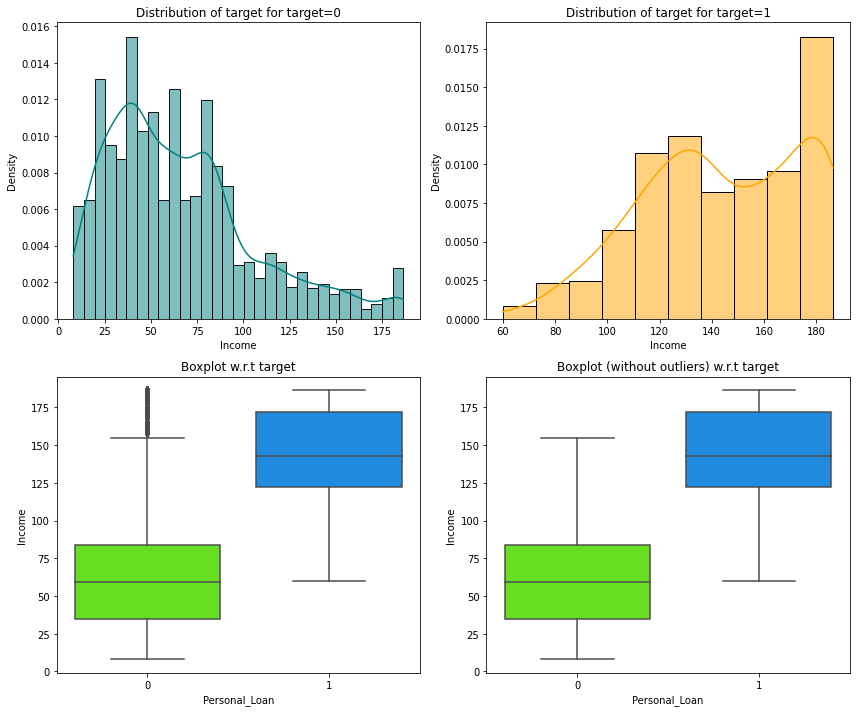

In [630]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

# Summary of EDA

**Data Description:**

* Dependent variable is the Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Education is of categorical type
* There are no missing values in the dataset.

* Data Cleaning:*

* Age, Income, and CCAvg Mortgage are of integer type while other variables are of categorical type
* There are no missing values or duplicates in the dataset.


**Observations from EDA:**


* All categorical variable are numeric by default.
* People with good credit score and income seem to procure more loan.
* Mortagage has outliers but also with more mortagage need loan. More experienced people also procure loan with high income correlation
* `age`: Average age of people in the dataset is 45 years, age has a wide range from 35 to 67 years.
* `experience and mortgage`: There might be data issues or outliers present in this variable.
* `ID`: Customer id doesn't add any value to dataset model for current usecase and can be removed.
* `personal_loan`: This is the dependent variable class. 
* Most families are of 3 people
* Most people do not have CD Account
* Experience has incorrect values like -3, -2




### Data Pre-Processing

#### Data Preparation

In [631]:
data=data.drop(["ID"], axis=1)
data.columns

Index(['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [632]:
data = data[data["Experience"] >= 0]

In [633]:
data["Personal_Loan"]=data["Personal_Loan"].astype('int64') #class variable

In [775]:
data["Personal_Loan"].unique()

[0, 1]
Categories (2, int64): [0, 1]

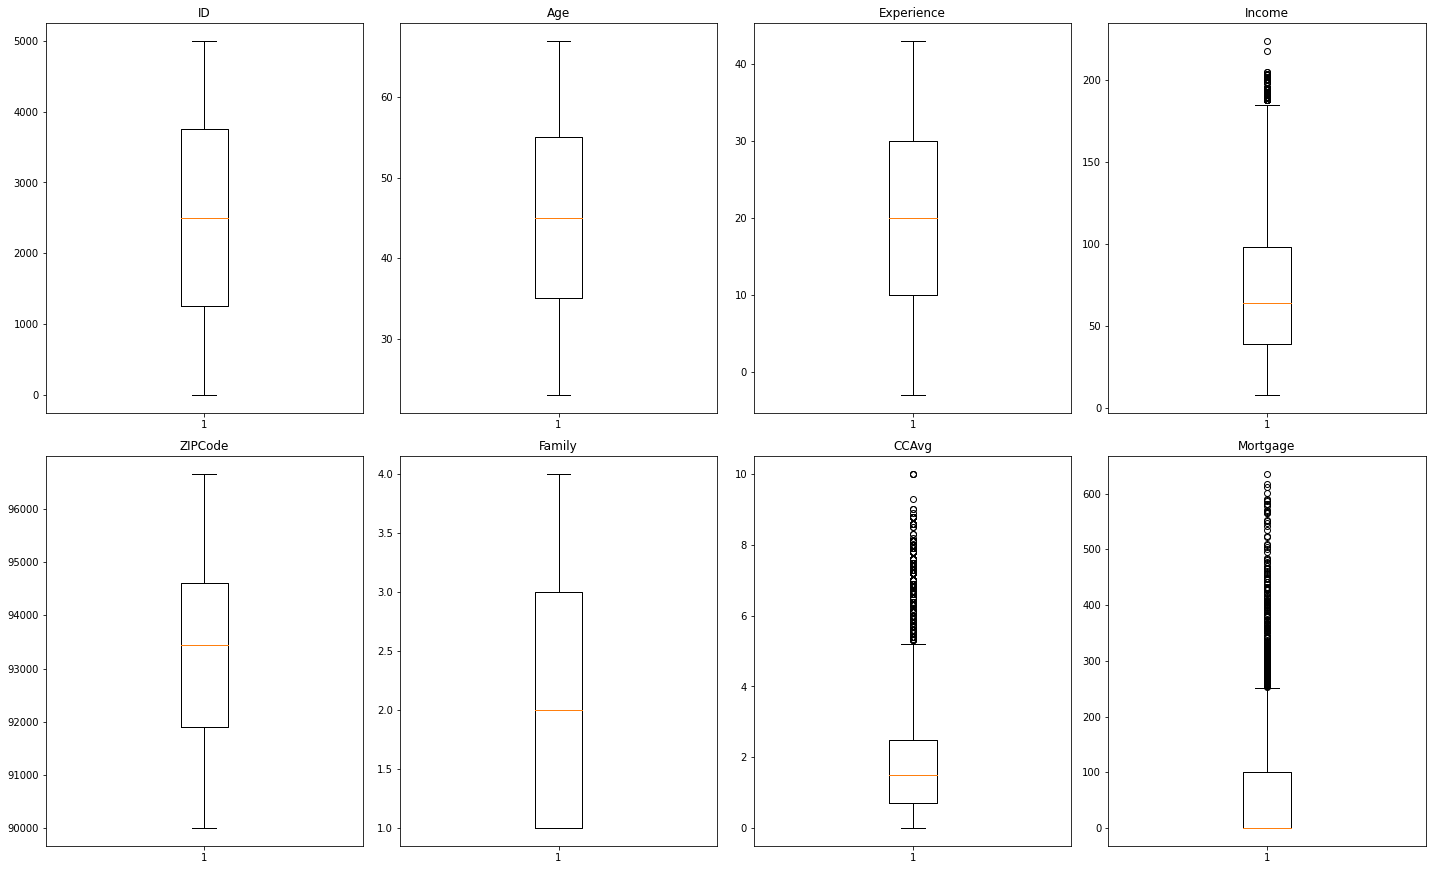

In [776]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

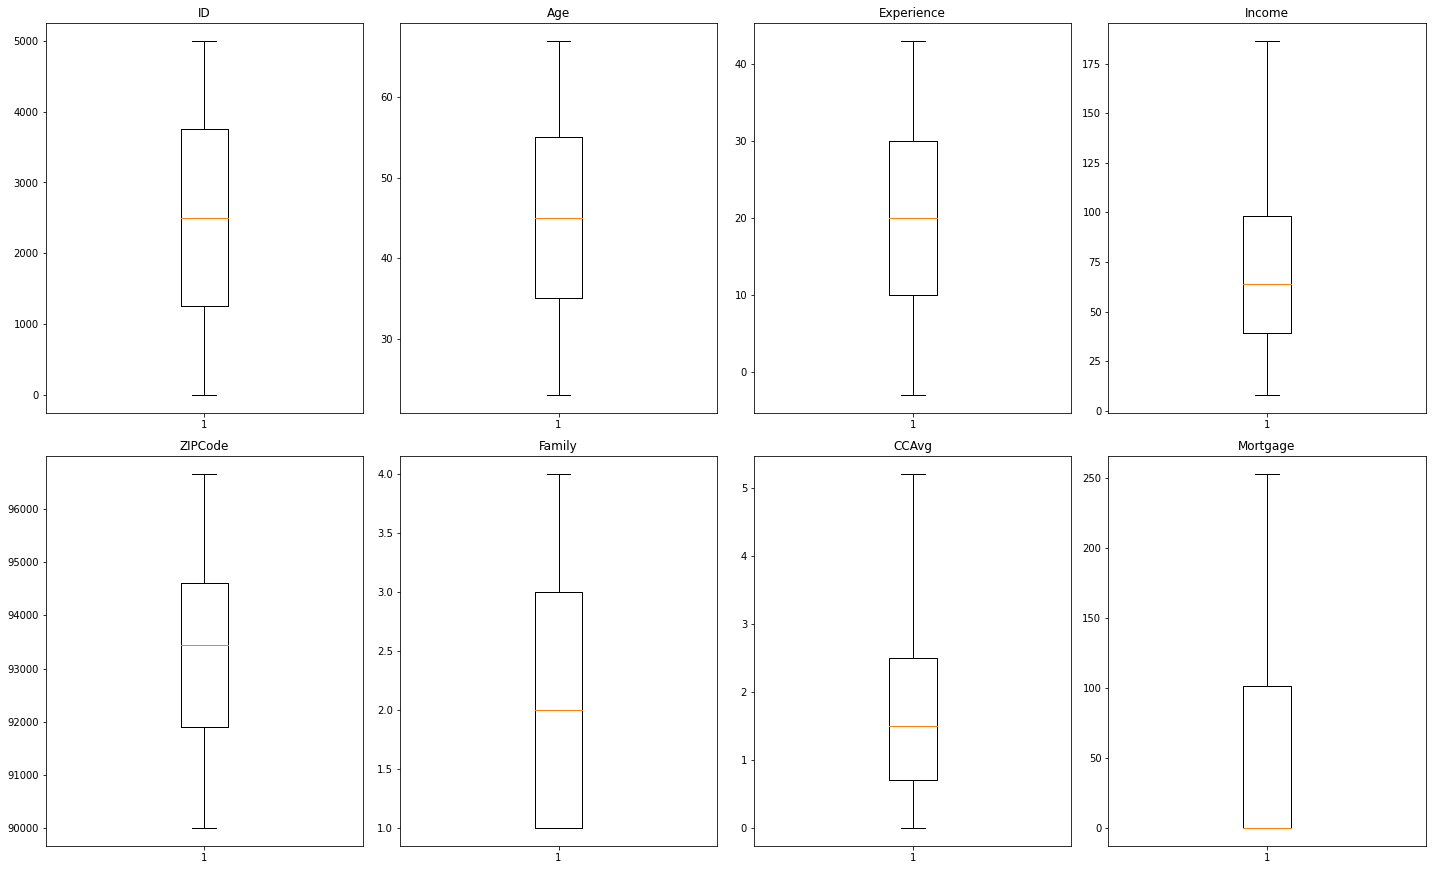

In [620]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df



numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Creating training and test sets.**

In [636]:
X = data.drop(["Personal_Loan"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [637]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3463, 13)
Shape of test set :  (1485, 13)
Percentage of classes in training set:
0    0.903263
1    0.096737
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.902357
1    0.097643
Name: Personal_Loan, dtype: float64


### Building the model

### Model evaluation criterion
0 do not need loan and 1 needs loan 


### How to reduce reach out to more people but target precision for user targeting also avoid this loss by not giving loan in cases of recall?
*  `F1 score` should be maximized, the greater the recall higher the chances of identifying who can be given loan with some tolerance for precision the classes correctly. F1 score can be good candidate to certain extent.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [638]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [639]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [640]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

### Finding the coefficients

In [641]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1,Intercept
Coefficients,-0.098267,0.109074,0.054134,-0.000109,0.587392,0.414819,0.002165,3.421208,3.416939,-0.447188,3.067014,-0.602591,-0.921597,-0.249694


### Coefficient interpretations


* Coefficient all the levels of Experience,Income,CCAvg,Education some levels of occupation, race, native country positive increase in these will lead to increase in chances of a person having <=50K salary.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [642]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
Odds,0.906407,1.115245,1.055626,0.999891,1.799290,1.514096,1.002167,30.606377,30.475994,0.639424,21.477664,0.547391,0.397883
Change_odd%,-9.359277,11.524515,5.562563,-0.010896,79.929002,51.409626,0.216699,2960.637747,2947.599412,-36.057631,2047.766447,-45.260859,-60.211701


#### Checking model performance on training set

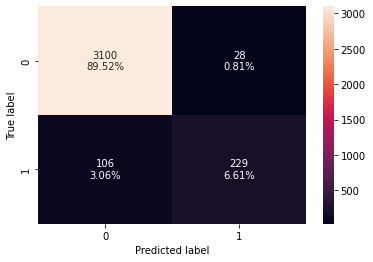

In [643]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [644]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.961305,0.683582,0.891051,0.773649


#### Checking performance on test set

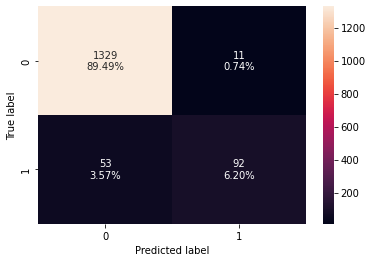

In [645]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [646]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.956902,0.634483,0.893204,0.741935


#### ROC-AUC

* ROC-AUC on training set

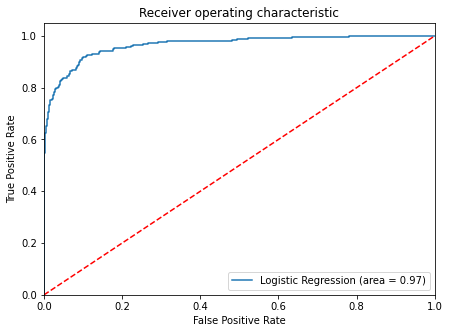

In [647]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

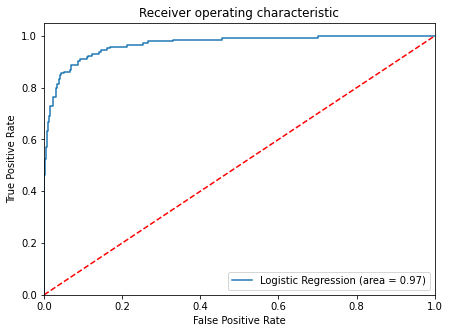

In [648]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [649]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.09774163460268347


#### Checking model performance on training set

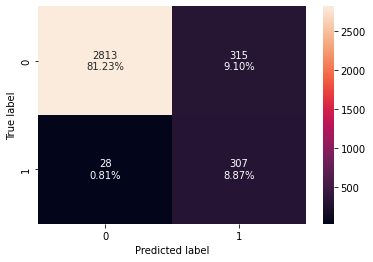

In [650]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [651]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc


# Accuracy	Recall	Precision	F1
# 0	0.780405	0.751019	0.946422	0.837474

Training performance:


,Accuracy,Recall,Precision,F1
0,0.900953,0.916418,0.493569,0.641588


#### Checking model performance on test set

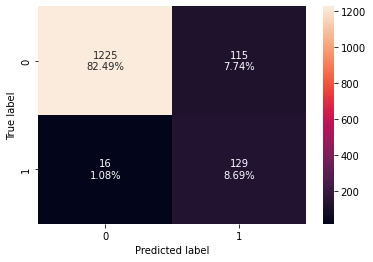

In [652]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [654]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc


Test set performance:


,Accuracy,Recall,Precision,F1
0,0.911785,0.889655,0.528689,0.663239


* The precision of the model for both training and test set has improved but the F1 score has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

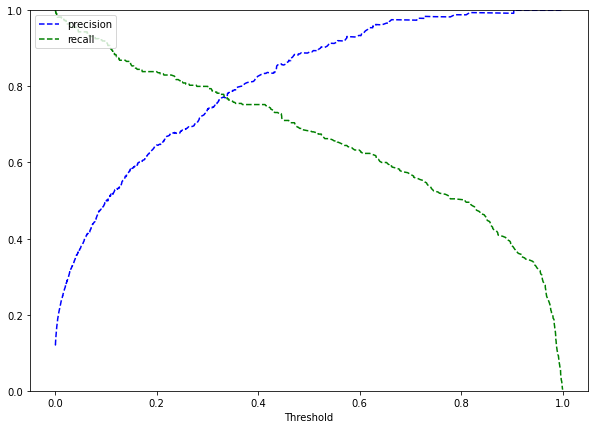

In [655]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.37, we get balanced recall and precision.

In [667]:
# setting the threshold
optimal_threshold_curve = 0.35

#### Checking model performance on training set

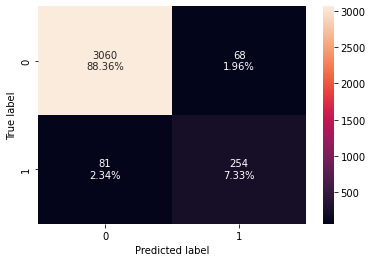

In [668]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [669]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve



Training performance:


,Accuracy,Recall,Precision,F1
0,0.956974,0.758209,0.78882,0.773212


#### Checking model performance on test set

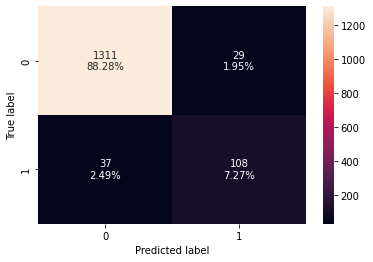

In [670]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [671]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.955556,0.744828,0.788321,0.765957


* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

### Model Performance Summary

In [672]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.35 Threshold"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.5 Threshold,Logistic Regression-0.35 Threshold
Accuracy,0.961305,0.900953,0.956974
Recall,0.683582,0.916418,0.758209
Precision,0.891051,0.493569,0.788820
F1,0.773649,0.641588,0.773212


In [312]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T
        ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.35 Threshold"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.5 Threshold,Logistic Regression-0.35 Threshold
Accuracy,0.958000,0.906000,0.956000
Recall,0.657718,0.892617,0.738255
Precision,0.890909,0.515504,0.802920
F1,0.756757,0.653563,0.769231


In [681]:
# Sequential feature selector is present in mlxtend library
# !pip install mlxtend to install mlxtent library

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# to plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [682]:
# from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="newton-cg", n_jobs=-1, random_state=1, max_iter=100)

In [683]:
X.shape

(4948, 13)

**Finding which features are important?**

In [685]:
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 2, 4, 5, 7, 8, 10, 12]


In [686]:
sfs1 = SFS(
    model,
    k_features=8,
    forward=True,
    floating=False,
    scoring="f1",
    verbose=2,
    cv=3,
    n_jobs=-1,
)

sfs1 = sfs1.fit(X_train, y_train)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.6s finished

[2021-12-18 02:26:06] Features: 1/8 -- score: 0.44049608122015815[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.0s finished

[2021-12-18 02:26:08] Features: 2/8 -- score: 0.5719151600042998[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.0s finished

[2021-12-18 02:26:08] Features: 3/8 -- score: 0.5999323865624689[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.0s finished

[2021-12-18 02:26:10] Features: 4/8 -- score: 0.72333

**Let's look at best 8 variables**

In [689]:
X_train.columns[feat_cols]

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education_2', 'Education_3',
       'CD_Account_1', 'CreditCard_1'],
      dtype='object')

In [690]:
X_train_final = X_train[X_train.columns[feat_cols]]

# Creating new x_test with the same variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [691]:
# Fitting logistic regession model

logreg = LogisticRegression(
    solver="newton-cg", penalty="none", verbose=True, n_jobs=-1, random_state=0
)

# There are several optimizer, we are using optimizer called as 'newton-cg' with max_iter equal to 10000
# max_iter indicates number of iteration needed to converge

logreg.fit(X_train_final, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(n_jobs=-1, penalty='none', random_state=0,
                   solver='newton-cg', verbose=True)

### Let's Look at model performance

* On training set

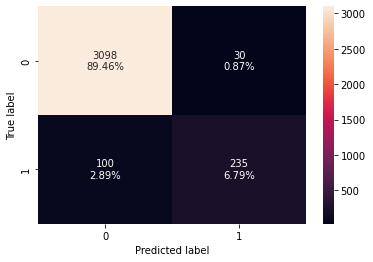

In [692]:
confusion_matrix_sklearn_with_threshold(logreg, X_train_final, y_train)

In [693]:
log_reg_model_train_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_train_final, y_train
)
print("Training performance:")
log_reg_model_train_perf_SFS

Training performance:


,Accuracy,Recall,Precision,F1
0,0.96246,0.701493,0.886792,0.783333


* On test set

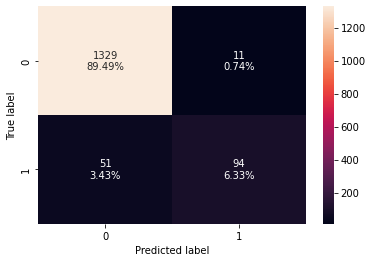

In [694]:
confusion_matrix_sklearn_with_threshold(logreg, X_test_final, y_test)

In [695]:
log_reg_model_test_perf_SFS = model_performance_classification_sklearn_with_threshold(
    logreg, X_test_final, y_test
)
print("Test set performance:")
log_reg_model_test_perf_SFS

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.958249,0.648276,0.895238,0.752


* Model is giving a generalized performance on training and test set.
* With a fewer number of features, the model performance is comparable to the initial logistic regression model.

### Model Performance Summary

In [696]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        log_reg_model_train_perf_SFS.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.35 Threshold",
    "Logistic Regression - SFS",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.5 Threshold,Logistic Regression-0.35 Threshold,Logistic Regression - SFS
Accuracy,0.961305,0.900953,0.956974,0.962460
Recall,0.683582,0.916418,0.758209,0.701493
Precision,0.891051,0.493569,0.788820,0.886792
F1,0.773649,0.641588,0.773212,0.783333


In [336]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.5 Threshold",
    "Logistic Regression-0.35 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.5 Threshold,Logistic Regression-0.35 Threshold
Accuracy,0.958000,0.906000,0.956000
Recall,0.657718,0.892617,0.738255
Precision,0.890909,0.515504,0.802920
F1,0.756757,0.653563,0.769231


### Conclusion
- We have been able to build a predictive model that can be used for targeting campaign with an f1_score of 0.76 and maximize 0.73 recall and 0.80 precision to help me accurate in targetting. sk_learn model might require more spend and 0.35 threshold gives us better targetting on the training set for targetting accordingly. 
* Coefficient of age, education,experience,cc_avg,CC_cert,Family, Mortgage some levels of increase  will lead to increase in chances of a person procuring a loan. 

### Recommendations

- We should target people with above median age with more experience, education with bigger family of 3 or 4.
- If person has Credit CC, cert he has higher users.
- People with less income, big families and can be target. But with less income and family, education should not be targeted.
- Education and Family size has strong corelation.
- Income, Family is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- Age', 'Income', 'Family', 'CCAvg', 'Education_2', 'Education_3', 'CD_Account_1', 'CreditCard_1' play a big role in recommendation


# Model building and implementation

## Decision Tree Classifier

In [697]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [698]:
loan_data=data.copy()
loan_data.head(10)


,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49.0,91107,4,1.6,1,0.0,0,1,0,0,0
1,45,19,34.0,90089,3,1.5,1,0.0,0,1,0,0,0
2,39,15,11.0,94720,1,1.0,1,0.0,0,0,0,0,0
3,35,9,100.0,94112,1,2.7,2,0.0,0,0,0,0,0
4,35,8,45.0,91330,4,1.0,2,0.0,0,0,0,0,1
5,37,13,29.0,92121,4,0.4,2,155.0,0,0,0,1,0
6,53,27,72.0,91711,2,1.5,2,0.0,0,0,0,1,0
7,50,24,22.0,93943,1,0.3,3,0.0,0,0,0,0,1
8,35,10,81.0,90089,3,0.6,2,104.0,0,0,0,1,0
9,34,9,180.0,93023,1,5.2,3,0.0,1,0,0,0,0


In [701]:

print(loan_data.Education.value_counts())
print(loan_data.Personal_Loan.value_counts())
print(loan_data.Securities_Account.value_counts())
print(loan_data.CD_Account.value_counts())
print(loan_data.Online.value_counts())
print(loan_data.CreditCard.value_counts())



1    2080
3    1481
2    1387
Name: Education, dtype: int64
0    4468
1     480
Name: Personal_Loan, dtype: int64
0    4432
1     516
Name: Securities_Account, dtype: int64
0    4646
1     302
Name: CD_Account, dtype: int64
1    2954
0    1994
Name: Online, dtype: int64
0    3493
1    1455
Name: CreditCard, dtype: int64


In [702]:
loan_data = data[data["Experience"] >= 0]
loan_data.count().sum()
loan_data.shape

(4948, 13)

In [703]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 4948 non-null   int64   
 1   Experience          4948 non-null   int64   
 2   Income              4948 non-null   float64 
 3   ZIPCode             4948 non-null   int64   
 4   Family              4948 non-null   int64   
 5   CCAvg               4948 non-null   float64 
 6   Education           4948 non-null   category
 7   Mortgage            4948 non-null   float64 
 8   Personal_Loan       4948 non-null   int64   
 9   Securities_Account  4948 non-null   category
 10  CD_Account          4948 non-null   category
 11  Online              4948 non-null   category
 12  CreditCard          4948 non-null   category
dtypes: category(5), float64(3), int64(5)
memory usage: 372.7 KB


In [704]:
oneHotCols=["Securities_Account","CD_Account","Online","CreditCard","Education"]
loan_data=pd.get_dummies(loan_data, columns=oneHotCols)
loan_data.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account_0,Securities_Account_1,CD_Account_0,CD_Account_1,Online_0,Online_1,CreditCard_0,CreditCard_1,Education_1,Education_2,Education_3
0,25,1,49.0,91107,4,1.6,0.0,0,0,1,1,0,1,0,1,0,1,0,0
1,45,19,34.0,90089,3,1.5,0.0,0,0,1,1,0,1,0,1,0,1,0,0
2,39,15,11.0,94720,1,1.0,0.0,0,1,0,1,0,1,0,1,0,1,0,0
3,35,9,100.0,94112,1,2.7,0.0,0,1,0,1,0,1,0,1,0,0,1,0
4,35,8,45.0,91330,4,1.0,0.0,0,1,0,1,0,1,0,0,1,0,1,0


In [705]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4948 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4948 non-null   int64  
 1   Experience            4948 non-null   int64  
 2   Income                4948 non-null   float64
 3   ZIPCode               4948 non-null   int64  
 4   Family                4948 non-null   int64  
 5   CCAvg                 4948 non-null   float64
 6   Mortgage              4948 non-null   float64
 7   Personal_Loan         4948 non-null   int64  
 8   Securities_Account_0  4948 non-null   uint8  
 9   Securities_Account_1  4948 non-null   uint8  
 10  CD_Account_0          4948 non-null   uint8  
 11  CD_Account_1          4948 non-null   uint8  
 12  Online_0              4948 non-null   uint8  
 13  Online_1              4948 non-null   uint8  
 14  CreditCard_0          4948 non-null   uint8  
 15  CreditCard_1         

In [706]:
X = loan_data.drop("Personal_Loan" , axis=1)
y = loan_data.pop("Personal_Loan")

## Split Data

In [707]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [708]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3463
Number of rows in test data = 1485


In [709]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.903263
1    0.096737
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.902357
1    0.097643
Name: Personal_Loan, dtype: float64


## Build Decision Tree Model
We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split.

If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become bias. we start with random state 1

In [710]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [711]:
##  Function to calculate recall score
def decision_get_recall_score(model):
    '''
    model : classifier to predict values of X

    '''
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
    print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

## Function to create confusion matrix
def decision_make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

Recall on training set :  1.0
Recall on test set :  0.8827586206896552


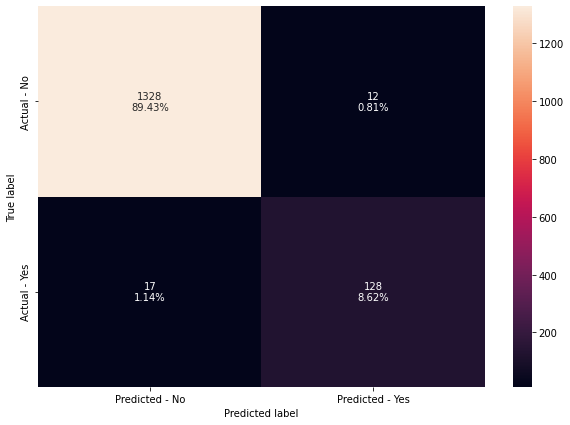

In [712]:
decision_make_confusion_matrix(dTree,y_test)
# Recall on train and test
decision_get_recall_score(dTree)

## Visualizing the Decision Tree

In [713]:
feature_names = list(X.columns)
print(feature_names)

['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account_0', 'Securities_Account_1', 'CD_Account_0', 'CD_Account_1', 'Online_0', 'Online_1', 'CreditCard_0', 'CreditCard_1', 'Education_1', 'Education_2', 'Education_3']


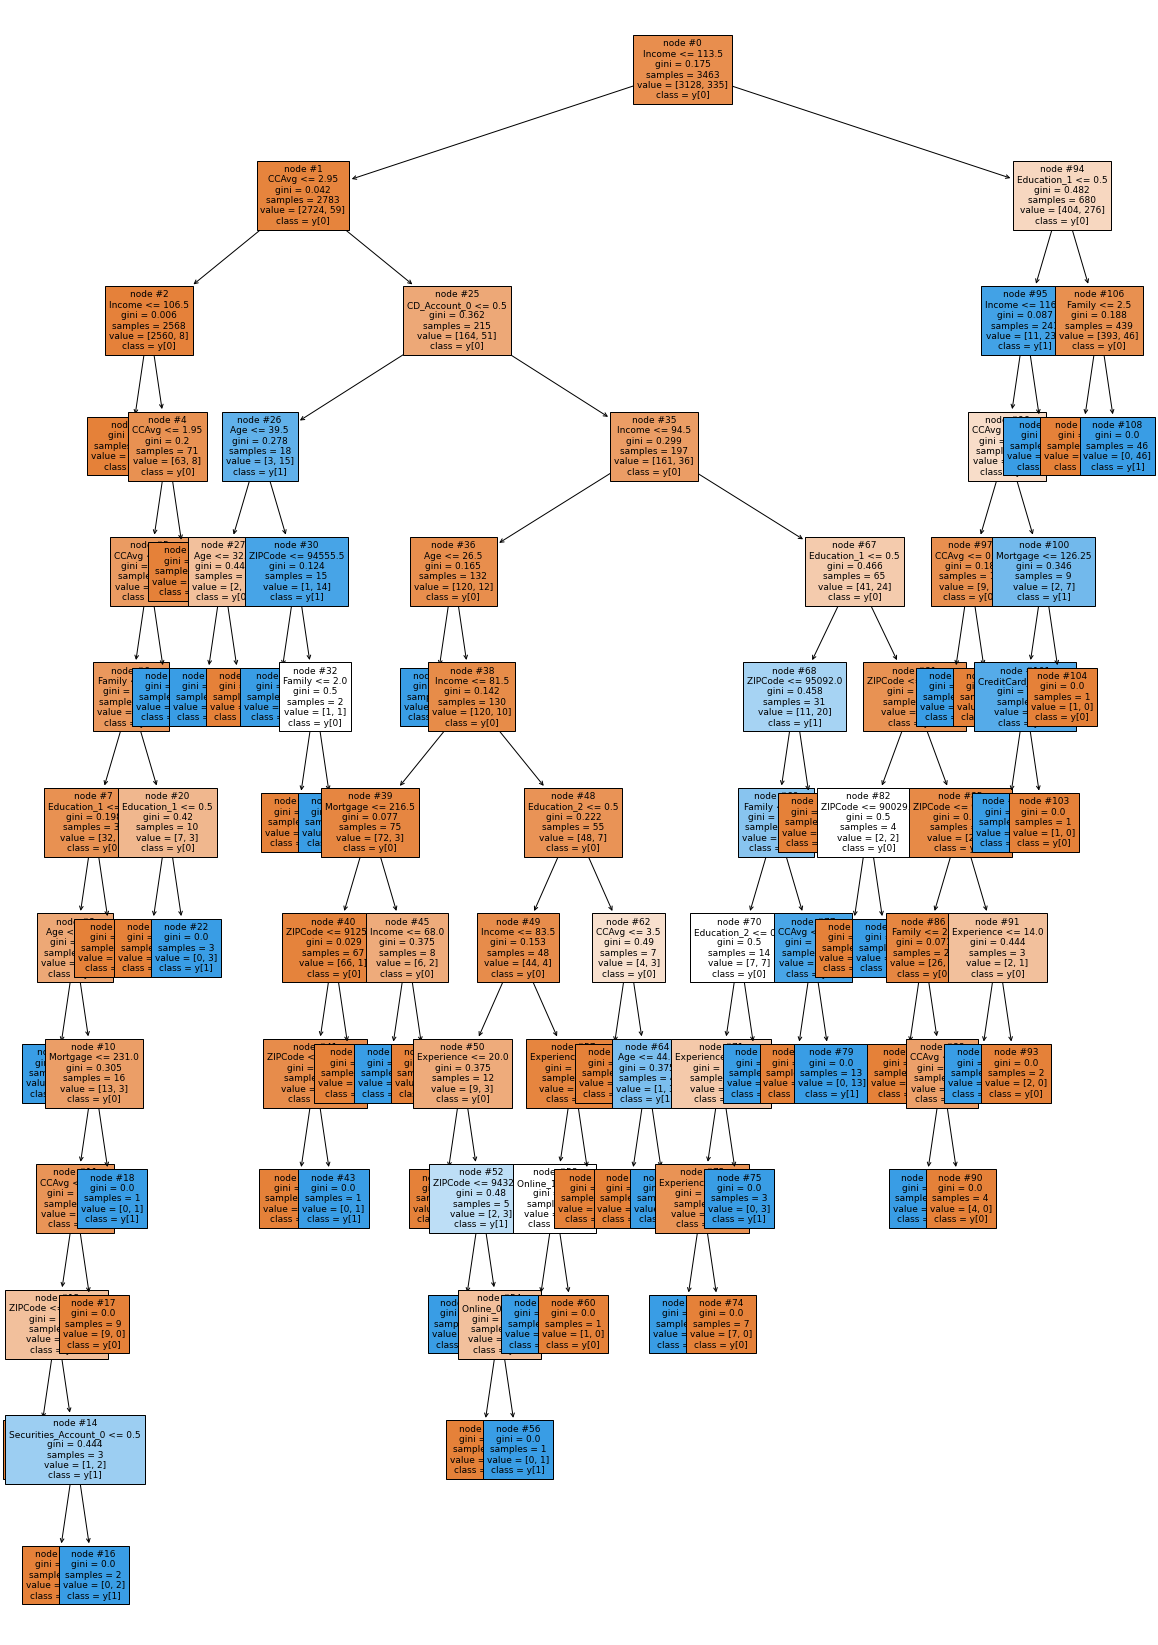

In [714]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [715]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2497.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- CCAvg <= 1.95
|   |   |   |   |--- CCAvg <= 1.85
|   |   |   |   |   |--- Family <= 3.50
|   |   |   |   |   |   |--- Education_1 <= 0.50
|   |   |   |   |   |   |   |--- Age <= 29.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- Age >  29.50
|   |   |   |   |   |   |   |   |--- Mortgage <= 231.00
|   |   |   |   |   |   |   |   |   |--- CCAvg <= 1.15
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode <= 92901.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [3.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- ZIPCode >  92901.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- CCAvg >  1.15
|   |   |   |   |   |   |   |   |   |   |--- weights: [9.00, 0.00] class: 0


In [716]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Education_1           0.394614
Income                0.307906
Family                0.143453
CCAvg                 0.060162
CD_Account_0          0.023071
ZIPCode               0.019500
Experience            0.015646
Age                   0.015256
Mortgage              0.005881
Education_2           0.005561
CreditCard_1          0.002892
Securities_Account_0  0.002203
Online_0              0.002203
Online_1              0.001652
Securities_Account_1  0.000000
CD_Account_1          0.000000
CreditCard_0          0.000000
Education_3           0.000000


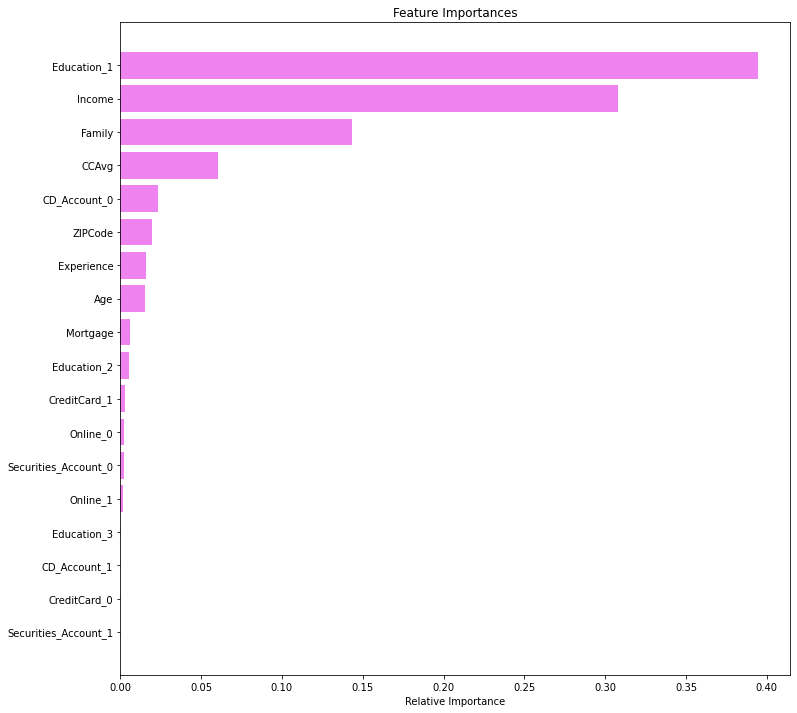

In [717]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Reducing over fitting

In [718]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

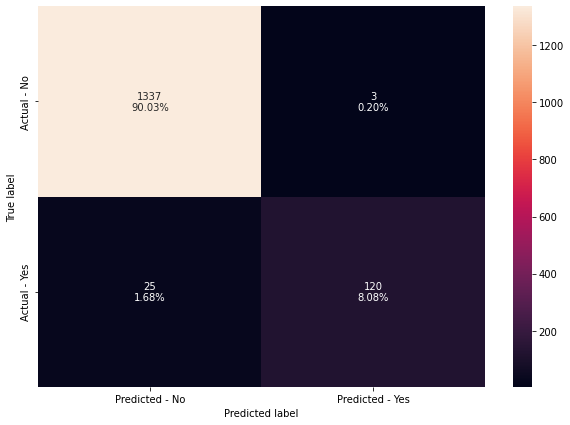

In [719]:
decision_make_confusion_matrix(dTree1, y_test)

In [720]:
# Accuracy on train and test
print("Accuracy on training set : ",dTree1.score(X_train, y_train))
print("Accuracy on test set : ",dTree1.score(X_test, y_test))
# Recall on train and test
decision_get_recall_score(dTree1)

Accuracy on training set :  0.9841178169217442
Accuracy on test set :  0.9811447811447811
Recall on training set :  0.844776119402985
Recall on test set :  0.8275862068965517


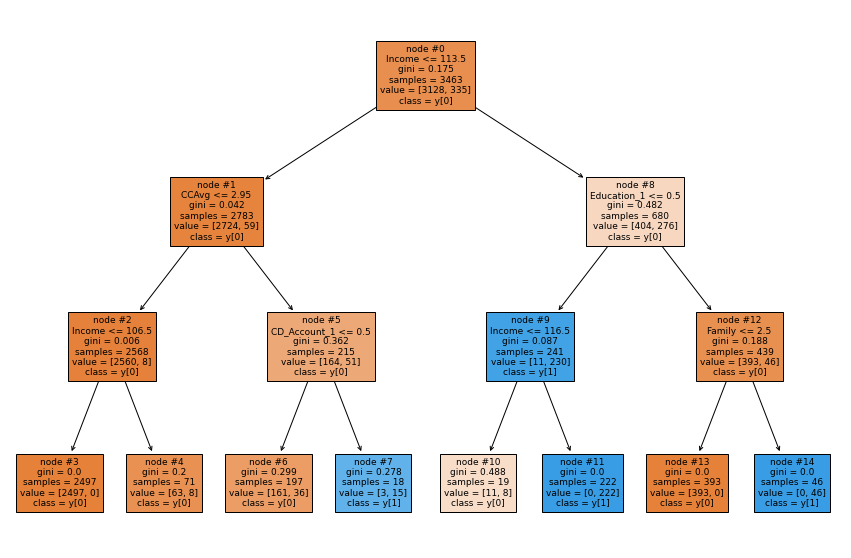

In [721]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [722]:
# Text report showing the rules of a decision tree -

print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- Income <= 113.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2497.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [63.00, 8.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account_1 <= 0.50
|   |   |   |--- weights: [161.00, 36.00] class: 0
|   |   |--- CD_Account_1 >  0.50
|   |   |   |--- weights: [3.00, 15.00] class: 1
|--- Income >  113.50
|   |--- Education_1 <= 0.50
|   |   |--- Income <= 116.50
|   |   |   |--- weights: [11.00, 8.00] class: 0
|   |   |--- Income >  116.50
|   |   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_1 >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [393.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 46.00] class: 1



In [723]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Education_1           0.433683
Income                0.338340
Family                0.159032
CCAvg                 0.041985
CD_Account_1          0.026960
Age                   0.000000
Online_0              0.000000
Education_2           0.000000
CreditCard_1          0.000000
CreditCard_0          0.000000
Online_1              0.000000
CD_Account_0          0.000000
Experience            0.000000
Securities_Account_1  0.000000
Securities_Account_0  0.000000
Mortgage              0.000000
ZIPCode               0.000000
Education_3           0.000000


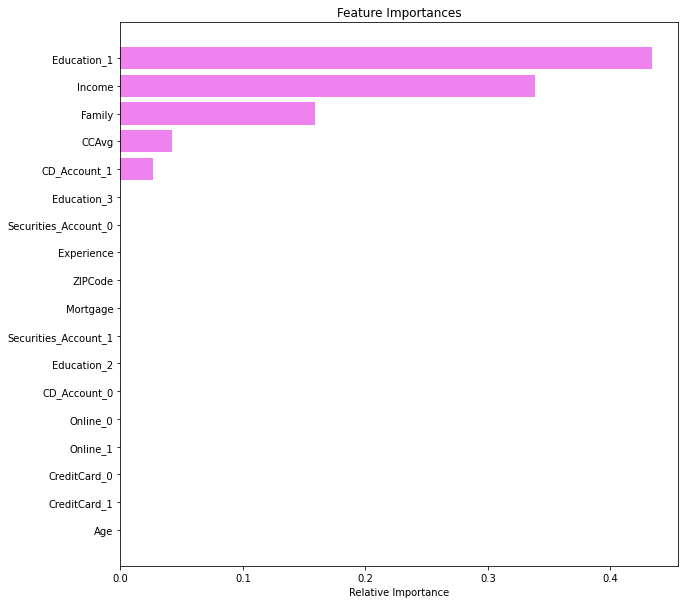

In [724]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Using GridSearch for Hyperparameter tuning of our tree model

In [725]:
from sklearn.model_selection import GridSearchCV
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

## Model performance evaluation and improvement

#### Confusion Matrix - decision tree with tuned hyperparameters

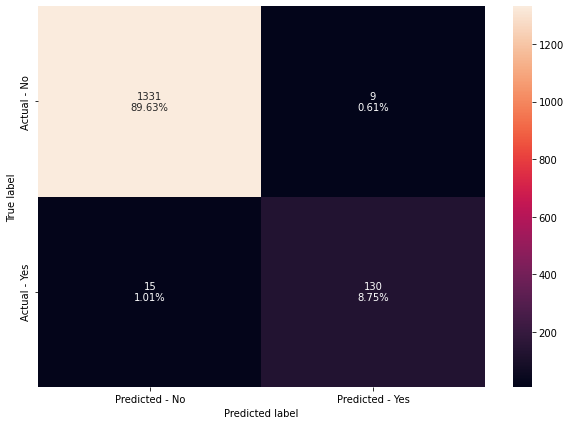

In [726]:
decision_make_confusion_matrix(estimator,y_test)

In [727]:
# Accuracy on train and test
print("Accuracy on training set : ",estimator.score(X_train, y_train))
print("Accuracy on test set : ",estimator.score(X_test, y_test))
# Recall on train and test
decision_get_recall_score(estimator)

Accuracy on training set :  0.9881605544325729
Accuracy on test set :  0.9838383838383838
Recall on training set :  0.9253731343283582
Recall on test set :  0.896551724137931


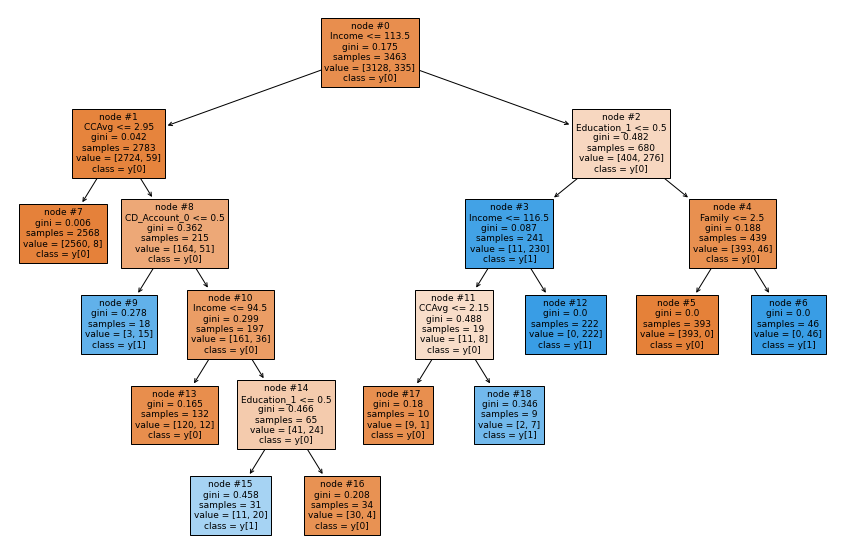

In [728]:
plt.figure(figsize=(15,10))

tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [729]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

#Here we will see that importance of features has increased

                           Imp
Education_1           0.435655
Income                0.336063
Family                0.153584
CCAvg                 0.048663
CD_Account_0          0.026036
Online_0              0.000000
Education_2           0.000000
CreditCard_1          0.000000
CreditCard_0          0.000000
Online_1              0.000000
Age                   0.000000
CD_Account_1          0.000000
Experience            0.000000
Securities_Account_1  0.000000
Securities_Account_0  0.000000
Mortgage              0.000000
ZIPCode               0.000000
Education_3           0.000000


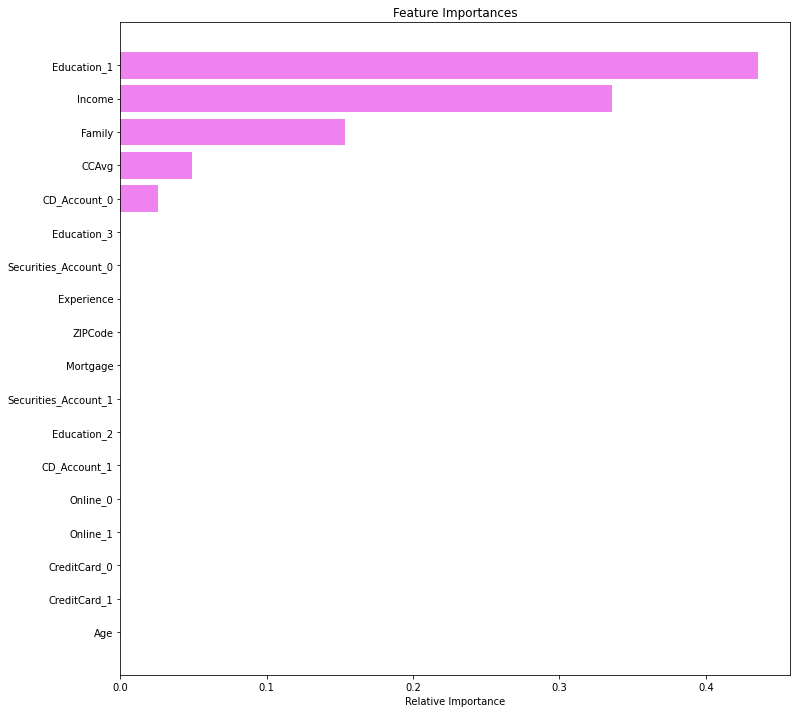

In [730]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Cost Complexity Pruning

In [731]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [732]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000270,0.000539
2,0.000270,0.001617
3,0.000281,0.002179
4,0.000284,0.002748
5,0.000334,0.003749
6,0.000347,0.004442
7,0.000351,0.005494
8,0.000385,0.005879
9,0.000432,0.006742


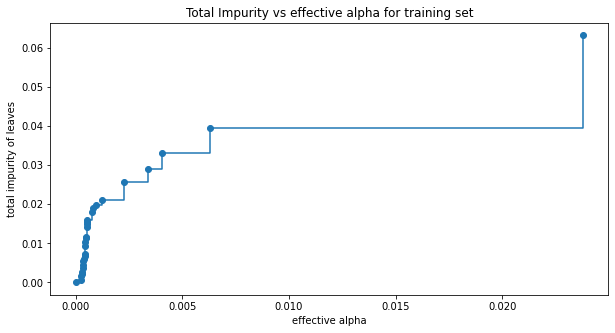

In [733]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [734]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.055779975764704705


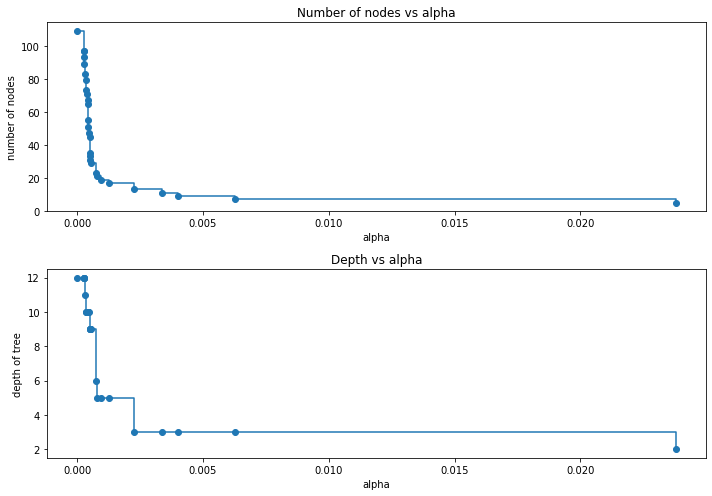

In [735]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [736]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

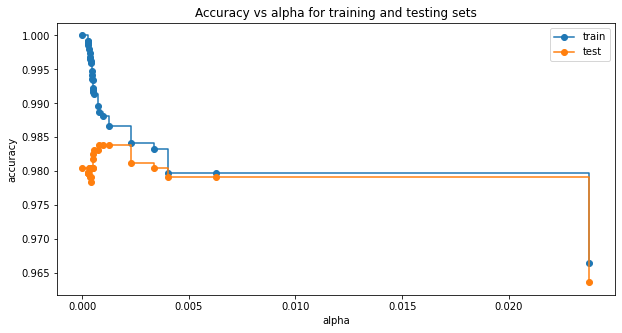

In [737]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [738]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train, y_train))
print('Test accuracy of best model: ',best_model.score(X_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0007984340047719738, random_state=1)
Training accuracy of best model:  0.9887380883626913
Test accuracy of best model:  0.9838383838383838


In [739]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [740]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

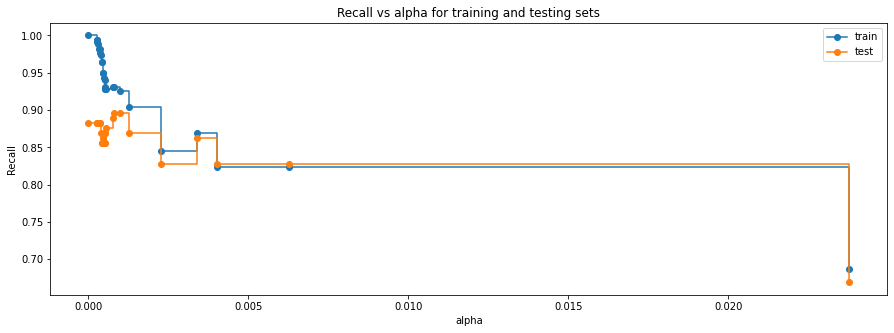

In [741]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [742]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0007984340047719738, random_state=1)


### Confusion Matrix - post-pruned decision tree

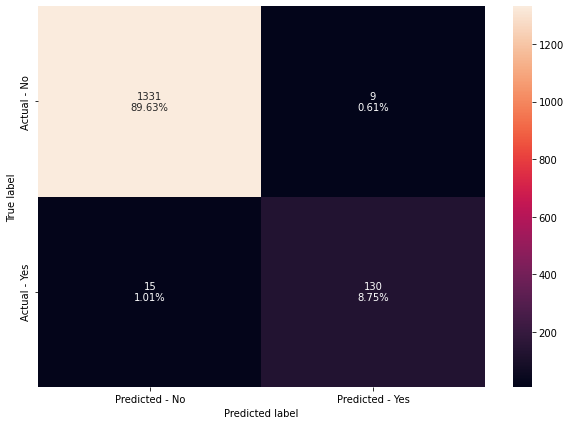

In [743]:
decision_make_confusion_matrix(best_model,y_test)

In [744]:
# Recall on train and test
decision_get_recall_score(best_model)

Recall on training set :  0.9313432835820895
Recall on test set :  0.896551724137931


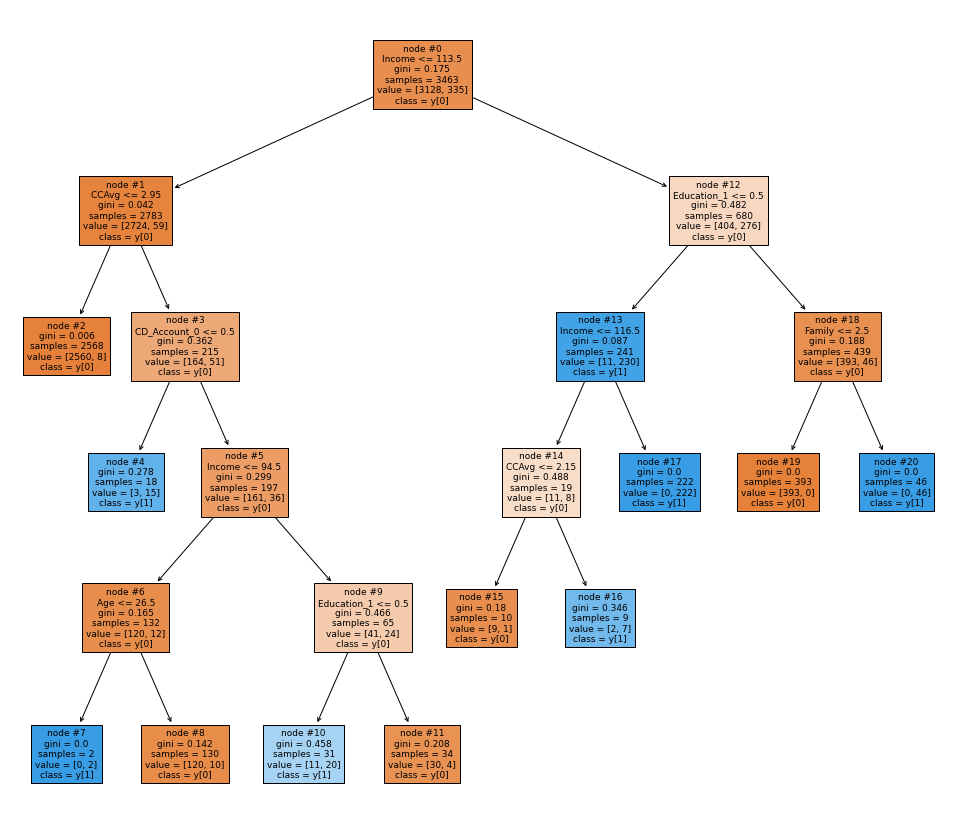

In [745]:
plt.figure(figsize=(17,15))

tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [746]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                           Imp
Education_1           0.432945
Income                0.333972
Family                0.152628
CCAvg                 0.048360
CD_Account_0          0.025874
Age                   0.006220
Mortgage              0.000000
Securities_Account_0  0.000000
Securities_Account_1  0.000000
Experience            0.000000
CD_Account_1          0.000000
Online_0              0.000000
Online_1              0.000000
CreditCard_0          0.000000
CreditCard_1          0.000000
ZIPCode               0.000000
Education_2           0.000000
Education_3           0.000000


**Decision tree with post-pruning is giving the highest recall on test set.**

### Summary: 
* We have maximized the Recall. Decision tree gives better accuracy

## Actionable Insights & Recommendations


**Both models build have good f1 score, recall and maximized, Decision tree performs better**


* We have built better model using decision tree compared to logistic regression with better accuracy and maximized recall for specific user target based on coefficients
Education_1           0.432945
Income                0.333972
Family                0.152628
CCAvg                 0.048360
CD_Account_0          0.025874
Age     


* Decision Tree will lesser variables
- Training accuracy of best model:  0.9887380883626913
- Test accuracy of best model:  0.9838383838383838
- Recall on test set :  0.896551724137931


**Campaign should target people with education, income family, CC average and CD account with higher values can be core target group for campaign of loan.**


# Thank you 